In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
data = pd.read_excel("C:\\Data science\\Assignments\\Online retail.xlsx")

c:\Users\jeeshan\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
c:\Users\jeeshan\anaconda3\Lib\site-packages\openpyxl\packaging\core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


In [5]:
# Check column name
print(data.columns)

Index(['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'], dtype='object')


In [6]:
# Data Preprocessing
# Remove duplicates
data_cleaned = data.drop_duplicates()


In [7]:
# Split the transactions into a list of items
transactions = data_cleaned['shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'].apply(lambda x: x.split(','))  # Replace with your column name

In [8]:
# Convert the list of transactions into a format suitable for apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [9]:
# Apply the Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

In [10]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)


In [11]:
# Sort rules by lift to find the most interesting ones
sorted_rules = rules.sort_values('lift', ascending=False)

c:\Users\jeeshan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\jeeshan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\jeeshan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


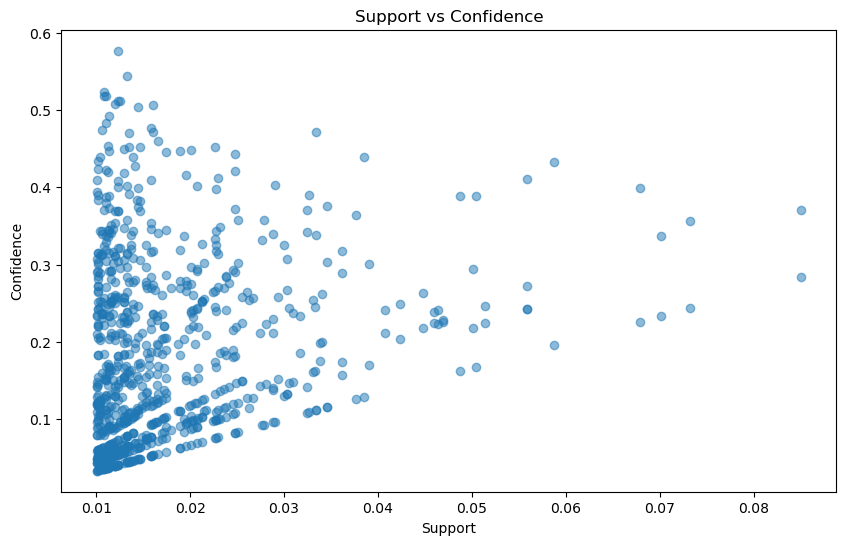

In [12]:
# Simple Visualization: Support vs Confidence Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

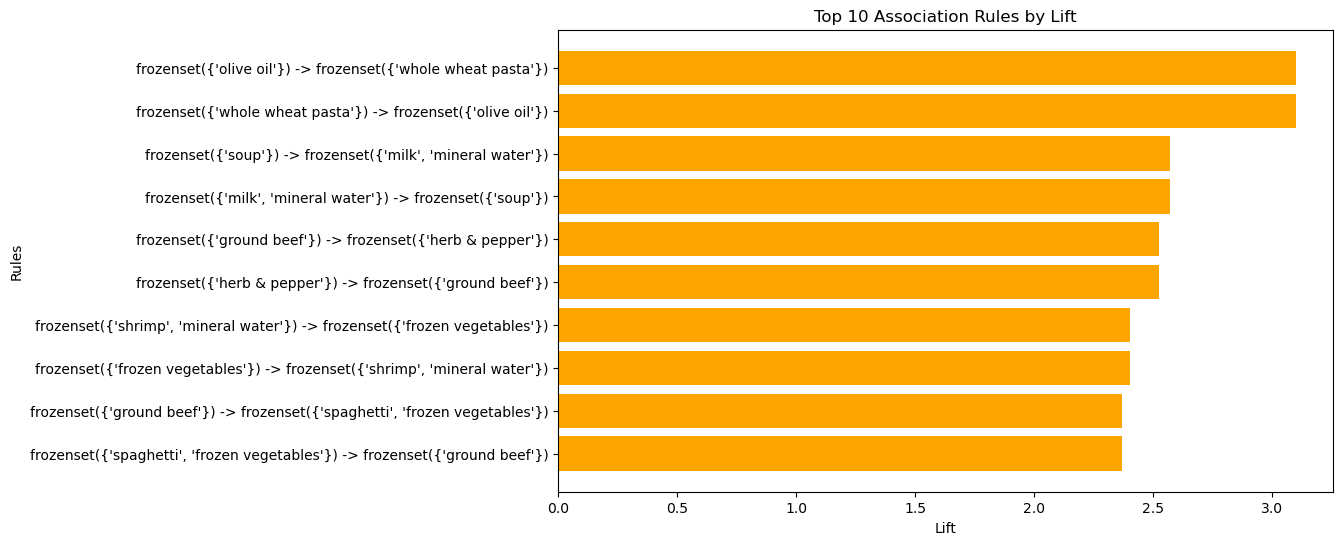

In [13]:
# Simple Visualization: Top 10 Rules by Lift
top_10_rules = sorted_rules.head(10)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_rules)), top_10_rules['lift'], color='orange')
plt.yticks(range(len(top_10_rules)), [f"{list(x)[0]} -> {list(x)[1]}" for x in zip(top_10_rules['antecedents'], top_10_rules['consequents'])])
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.show()

In [14]:
# Display the top 10 rules
print("Top 10 Association Rules by Lift:")
print(top_10_rules)

Top 10 Association Rules by Lift:
                        antecedents                     consequents  \
424                     (olive oil)             (whole wheat pasta)   
425             (whole wheat pasta)                     (olive oil)   
795                          (soup)           (milk, mineral water)   
794           (milk, mineral water)                          (soup)   
298                   (ground beef)                 (herb & pepper)   
299                 (herb & pepper)                   (ground beef)   
736         (shrimp, mineral water)             (frozen vegetables)   
737             (frozen vegetables)         (shrimp, mineral water)   
721                   (ground beef)  (spaghetti, frozen vegetables)   
716  (spaghetti, frozen vegetables)                   (ground beef)   

     antecedent support  consequent support   support  confidence      lift  \
424            0.087536            0.040580  0.011014    0.125828  3.100757   
425            0.040580   

In [15]:
# Display the generated rules
print("\nGenerated Rules:")
print(rules.head())


Generated Rules:
       antecedents      consequents  antecedent support  consequent support  \
0        (almonds)  (mineral water)            0.029179            0.299710   
1  (mineral water)        (almonds)            0.299710            0.029179   
2        (avocado)      (chocolate)            0.045797            0.205217   
3      (chocolate)        (avocado)            0.205217            0.045797   
4   (french fries)        (avocado)            0.192657            0.045797   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.010821    0.370861  1.237399  0.002076    1.113092       0.197619  
1  0.010821    0.036106  1.237399  0.002076    1.007186       0.273962  
2  0.010242    0.223629  1.089716  0.000843    1.023715       0.086281  
3  0.010242    0.049906  1.089716  0.000843    1.004325       0.103588  
4  0.011594    0.060181  1.314069  0.002771    1.015304       0.296039  


In [ ]:
# Interview Questions and Answers
## 1. What is Lift and why is it important in Association rules?
lift_answer = """
Lift measures how much more likely items A and B are bought together than if they were independent.
It's important because it highlights relationships that are stronger than random chance, helping
businesses identify product combinations that may influence customer purchasing behavior.
"""
print(lift_answer)

## 2. What is Support and Confidence? How do you calculate them?
support_confidence_answer = """
Support indicates how frequently an itemset appears in the dataset. It's calculated as:
Support(A) = (Transactions containing A) / (Total transactions)
Confidence is the likelihood that a rule is correct, calculated as:
Confidence(A -> B) = (Transactions containing A and B) / (Transactions containing A)
These metrics help in determining the strength and relevance of the association rules.
"""
print(support_confidence_answer)

## 3. What are some limitations or challenges of Association Rule Mining?
limitations_answer = """
Challenges include:
- Managing large datasets: The complexity of computation can be high.
- Choosing the right thresholds: Setting support, confidence, and lift thresholds that yield meaningful results without too much noise.
- Interpretability: When too many rules are generated, it can be difficult to interpret and extract actionable insights.
"""
print(limitations_answer)
